<a href="https://colab.research.google.com/github/VicktorKu/nn_2022/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №4

студента групи КН-31

Кульковця Віктора

На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи (7, 0, 4).
Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.


4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/100
563/563 [==============================] - 4s 4ms/step - loss: 0.7125 - accuracy: 0.6152 - lr: 1.0000e-04
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4334 - accuracy: 0.7523 - lr: 1.1220e-04
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 0.3612 - accuracy: 0.8979 - lr: 1.2589e-04
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 0.2958 - accuracy: 0.9783 - lr: 1.4125e-04
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2068 - accuracy: 0.9863 - lr: 1.5849e-04
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9862 - lr: 1.7783e-04
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9872 - lr: 1.9953e-04
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0535 - accuracy: 0.9883 - lr: 2.23

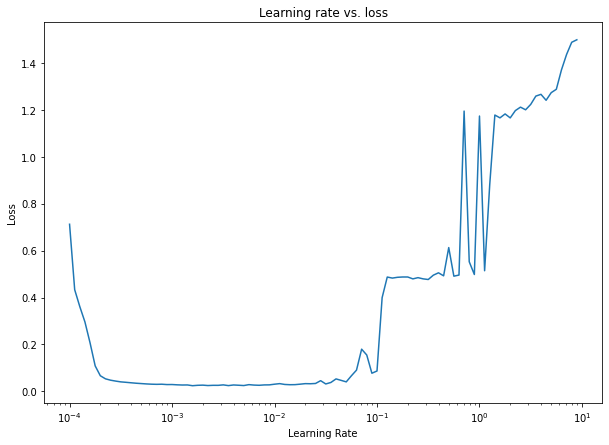

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

my_train_data = []
my_train_labels = []
for i in range(len(train_labels)):
  if train_labels[i]==7:
    my_train_data.append(train_data[i])
    my_train_labels.append(0)
  if train_labels[i]==0:
    my_train_data.append(train_data[i])
    my_train_labels.append(1)
  if train_labels[i]==4:
    my_train_data.append(train_data[i])
    my_train_labels.append(2)

my_train_data = tf.constant(my_train_data, dtype="float32")
my_train_data = my_train_data / 255.0
my_train_labels = tf.constant(my_train_labels)

my_test_data = []
my_test_labels = []
for i in range(len(test_labels)):
  if test_labels[i]==7:
    my_test_data.append(train_data[i])
    my_test_labels.append(0)
  if test_labels[i]==0:
    my_test_data.append(train_data[i])
    my_test_labels.append(1)
  if test_labels[i]==4:
    my_test_data.append(train_data[i])
    my_test_labels.append(2)

my_test_data = tf.constant(my_test_data, dtype="float32")
my_test_data = my_test_data / 255.0
my_test_labels = tf.constant(my_test_labels)

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_1.fit(my_train_data, 
                      my_train_labels, 
                      epochs=100, 
                      callbacks=[lr_scheduler])

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 2s 2ms/step - loss: 0.0898 - accuracy: 0.9738 - val_loss: 5.2821 - val_accuracy: 0.3217
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0445 - accuracy: 0.9877 - val_loss: 5.3746 - val_accuracy: 0.3233
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 7.2538 - val_accuracy: 0.3240
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9887 - val_loss: 5.8562 - val_accuracy: 0.3213
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 6.3936 - val_accuracy: 0.3223
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 8.6989 - val_accuracy: 0.3330
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9904 - val_loss: 7.1341 - val_accuracy: 0.3197
Epoch 8/20
563/56

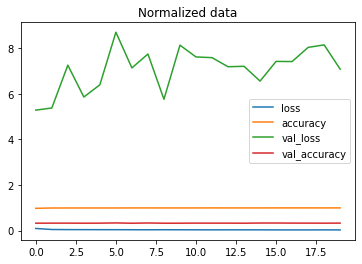

In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

my_train_data = []
my_train_labels = []
for i in range(len(train_labels)):
  if train_labels[i]==7:
    my_train_data.append(train_data[i])
    my_train_labels.append(0)
  if train_labels[i]==0:
    my_train_data.append(train_data[i])
    my_train_labels.append(1)
  if train_labels[i]==4:
    my_train_data.append(train_data[i])
    my_train_labels.append(2)

my_train_data = tf.constant(my_train_data, dtype="float32")
my_train_data = my_train_data / 255.0
my_train_labels = tf.constant(my_train_labels)

my_test_data = []
my_test_labels = []
for i in range(len(test_labels)):
  if test_labels[i]==7:
    my_test_data.append(train_data[i])
    my_test_labels.append(0)
  if test_labels[i]==0:
    my_test_data.append(train_data[i])
    my_test_labels.append(1)
  if test_labels[i]==4:
    my_test_data.append(train_data[i])
    my_test_labels.append(2)

my_test_data = tf.constant(my_test_data, dtype="float32")
my_test_data = my_test_data / 255.0
my_test_labels = tf.constant(my_test_labels)

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.005),
                metrics=['accuracy'])

history = model_1.fit(my_train_data, 
                      my_train_labels, 
                      epochs=20, 
                      validation_data=(my_test_data, my_test_labels))

pd.DataFrame(history.history).plot(title="Normalized data");

Висновок: на лабораторній роботі ми розібрали класифікацію за допомогою TensorFlow